# Лабораторная работа по анализу данных
## Работу выполнил студент группы 14 ПМИ 
### Огурцов Антон
Данные телекоммуникационной компании, содержащей информацию об оттоке клиентов. Набор данных содержит 7044 пользователей. В качестве атрибутов принимаются:
- Id клиента.
- Сервисы внутри телефонной компании, к которой подключился пользователь:  phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Информация о пользователе, как о клиенте сервиса: how long they have been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
- Личная (демографическая) информация о пользователе:
 gender, age range, and if they have partners and dependents. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
%matplotlib inline

In [4]:
data = pd.read_csv('Telco-Customer-Churn.csv', sep = ',', engine = 'python')

In [5]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Так как была возможность предложить свой датасет, мне стало интересно попробовать применить анализ данных для оттока клиентов.


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.index

RangeIndex(start=0, stop=7043, step=1)

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


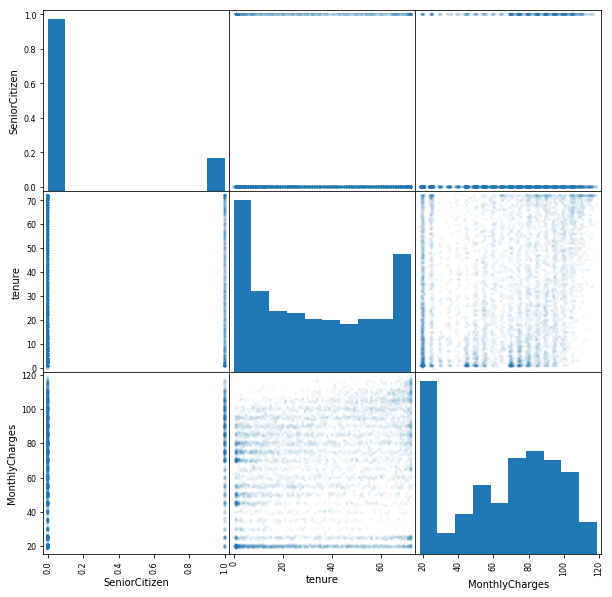

In [10]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

In [11]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


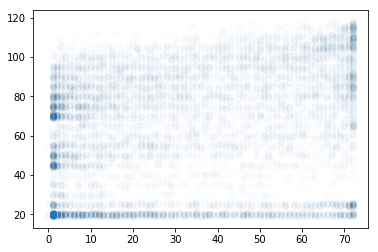

In [12]:
plt.plot(data['tenure'], data['MonthlyCharges'], 'o', alpha = 0.01)

In [13]:
data['Churn'] == 'Yes'

0       False
1       False
2        True
3       False
4        True
5        True
6       False
7       False
8        True
9       False
10      False
11      False
12      False
13       True
14      False
15      False
16      False
17      False
18       True
19      False
20       True
21      False
22       True
23      False
24      False
25      False
26       True
27       True
28      False
29       True
        ...  
7013    False
7014    False
7015    False
7016    False
7017    False
7018     True
7019    False
7020    False
7021     True
7022    False
7023    False
7024    False
7025    False
7026     True
7027    False
7028    False
7029    False
7030    False
7031    False
7032     True
7033    False
7034     True
7035    False
7036    False
7037    False
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7043, dtype: bool

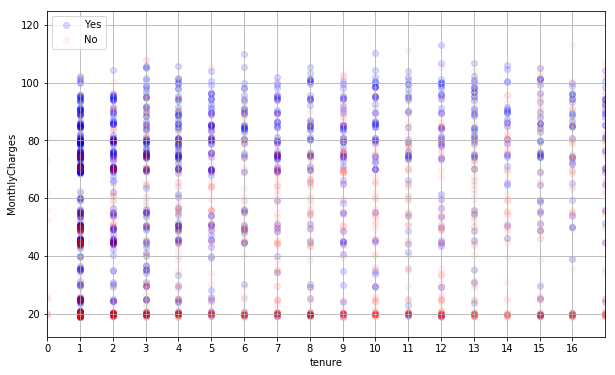

In [14]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Churn'] == 'Yes']['tenure'],
            data[data['Churn'] == 'Yes']['MonthlyCharges'],
            alpha = 0.15,
            label = 'Yes',
            color = 'b')

plt.scatter(data[data['Churn'] == 'No']['tenure'],
            data[data['Churn'] == 'No']['MonthlyCharges'],
            alpha = 0.05,
            label = 'No',
            color = 'r')

plt.xlabel('tenure')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('MonthlyCharges')
plt.legend()
plt.grid()

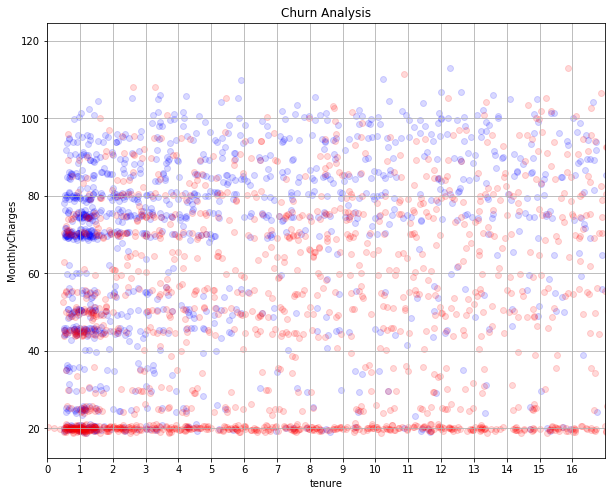

In [15]:
np.random.seed(0)
tenure_rnd = data['tenure'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(tenure_rnd[data['Churn'] == 'Yes'],
            data[data['Churn'] == 'Yes']['MonthlyCharges'],
            alpha = 0.15,
            label = 'Yes',
            color = 'b')

plt.scatter(tenure_rnd[data['Churn'] == 'No'],
            data[data['Churn'] == 'No']['MonthlyCharges'],
            alpha = 0.15,
            label = 'No',
            color = 'r')

plt.xlabel('tenure')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('MonthlyCharges')
plt.title('Churn Analysis')
plt.grid()

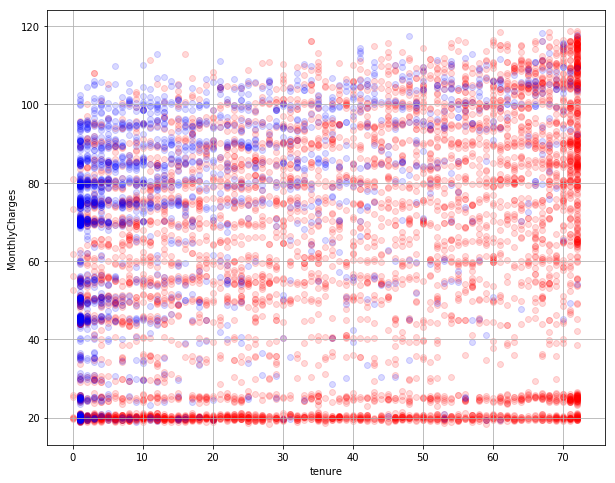

In [16]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['Churn'] == 'No']['tenure'],
            data[data['Churn'] == 'No']['MonthlyCharges'],
            alpha = 0.15,
            label = 'No',
            color = 'r')

plt.scatter(data[data['Churn'] == 'Yes']['tenure'],
            data[data['Churn'] == 'Yes']['MonthlyCharges'],
            alpha = 0.15,
            label = 'Yes',
            color = 'b')

plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.grid()

In [17]:
data.describe(include = ['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,2696-RZVZW,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [18]:
data.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,2696-RZVZW,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [19]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [21]:
data = data.drop('TotalCharges', axis = 1)\
           .drop('customerID', axis = 1)\

Убираем TotalCharges столбец, потому что у него сильная корреляция с MonthlyCharges.

## Обработка пропущенных значений.
Заполняем пропущенные значения средними значениями по столбцу.

In [22]:
#categorical_columns = []
#numerical_columns = []
#for c in data.columns:
#    if data[c].dtype.name == 'object':
#        categorical_columns.append(c)
#    else:
#        numerical_columns.append(c)

In [23]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [24]:
for c in categorical_columns:
    print(c, data[c].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [25]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [26]:
data[numerical_columns].count(axis = 0)

SeniorCitizen     7043
tenure            7043
MonthlyCharges    7043
dtype: int64

In [27]:
data[categorical_columns].count(axis = 0)

gender              7043
Partner             7043
Dependents          7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
Churn               7043
dtype: int64

In [28]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

### Векторизация

In [29]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'] ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [30]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
data.at[data['gender'] == 'Male', 'gender'] = 1
data.at[data['gender'] == 'Female', 'gender'] = 0
data['gender'].describe()

count     7043
unique       2
top          1
freq      3555
Name: gender, dtype: int64

In [32]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
data.at[data['Partner'] == 'Yes', 'Partner'] = 1
data.at[data['Partner'] == 'No', 'Partner'] = 0
data.at[data['Dependents'] == 'Yes', 'Dependents'] = 1
data.at[data['Dependents'] == 'No', 'Dependents'] = 0
data.at[data['PhoneService'] == 'Yes', 'PhoneService'] = 1
data.at[data['PhoneService'] == 'No', 'PhoneService'] = 0
data.at[data['PaperlessBilling'] == 'Yes', 'PaperlessBilling'] = 1
data.at[data['PaperlessBilling'] == 'No', 'PaperlessBilling'] = 0
data['Partner'].describe()

count     7043
unique       2
top          0
freq      3641
Name: Partner, dtype: int64

In [34]:
data['Partner'].unique()[0]

1

In [35]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [36]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [37]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- `Выполняем нормализацию`

In [38]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [39]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(7043, 40)


In [40]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,-5.397815e-16,-2.616740e-18,-1.451534e-15,0.481329,0.096834,0.421837,0.343746,0.439585,0.216669,0.496663,...,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,1.000000e+00,1.000000e+00,1.000000e+00,0.499687,0.295752,0.493888,0.474991,0.496372,0.412004,0.500024,...,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,-4.398853e-01,-1.318071e+00,-1.545750e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.398853e-01,-9.516141e-01,-9.724708e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.398853e-01,-1.372647e-01,1.857195e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-4.398853e-01,9.213896e-01,8.337743e-01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.272997e+00,1.613587e+00,1.794225e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
X = data.drop(('Churn'), axis = 1) # выбрасываем столбец 'Churn'
y = data['Churn']
feature_names = X.columns
#print feature_names

In [42]:
type(feature_names)

pandas.core.indexes.base.Index

In [43]:
print(X.shape)
print(y.shape)
N, d = X.shape

(7043, 39)
(7043,)


In [44]:
type(y)

pandas.core.series.Series

In [45]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

4930 2113


C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Разбили выборку в пропорции 30 на 70, где 30% тестовая выборка.

# $k$NN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
#knn.set_params(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Запускаем алгоритм k ближайших значений со стоковыми параметрами для обучающей выборки.

In [47]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.167748478702 0.233790818741


In [49]:
err_test = 1 - knn.score(X_test, y_test)

#### Confusion matrix 

In [50]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1318  223]
 [ 271  301]]


### Подбор параметров

In [51]:
from sklearn.grid_search import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print (best_cv_err, best_n_neighbors)

C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.21683569979716022 15


В результате наименьшая ошибка получается при k=10 соседей.

In [52]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.193509127789 0.217699952674


В результате ошибка на тестовой выборке уменьшилась на 0.02.

In [53]:
k = range(1, 22, 3)
list_err_train = []
list_err_test = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    list_err_train.append(np.mean(y_train != knn.predict(X_train)))
    list_err_test.append(np.mean(y_test  != knn.predict(X_test)))
    print(i)

1
4
7
10
13
16
19


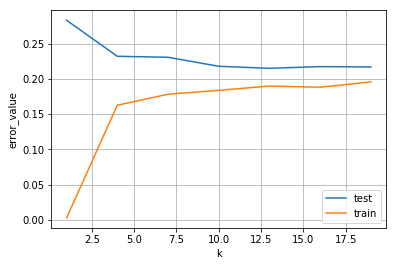

In [54]:
plt.plot(k, list_err_test, label='test')
plt.plot(k, list_err_train, label='train')
plt.xlabel('k')
plt.ylabel('error_value')
plt.legend(loc='lower right')
plt.grid()

## Нейронные сети

### Обучение

In [55]:
from sklearn.neural_network import MLPClassifier

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [69]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 10)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Качество классификации

In [70]:
y_train_pred = mlp_model.predict(X_train)plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass
y_test_pred = mlp_model.predict(X_test)

In [71]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.833468559838 0.779933743493


In [72]:
print(1 - mlp_model.score(X_test, y_test))

0.220066256507


## Подбираем параметры

In [73]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 10)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

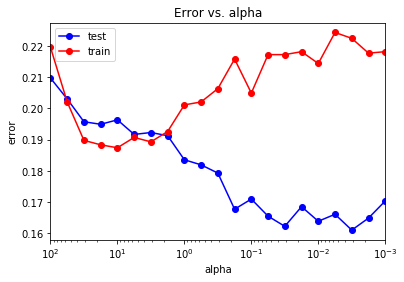

In [74]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

С уменьшением коэффициента регуляризатора ошибка на тестовой выб  уменьшается. При большом значении альфа модель сглаживается и недообучается.

##### Minimal error value


In [75]:
print(np.min(train_err), np.min(test_err))

0.161054766734 0.187411263606


In [76]:
alpha_opt = alpha_arr[test_err == np.min(test_err)]
print(alpha_opt)

[ 10.]


### Как ведет себя классификатор при оптимальном значении альфа:

In [77]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 10)
mlp_model.fit(X_train, y_train)

print(np.min(train_err), np.min(test_err))

0.161054766734 0.187411263606


Подбираем чисто нейронов:

In [79]:
hidden_layer_sizes_arr = np.arange(50,300,50)
hidden_layer_sizes_arr
test_err_hidden_layer = []
train_err_hidden_layer = []
for hidden_layer_sizes in hidden_layer_sizes_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = hidden_layer_sizes, 
                              solver = 'lbfgs', activation = 'logistic', random_state = 10)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err_hidden_layer.append(np.mean(y_train != y_train_pred))
    test_err_hidden_layer.append(np.mean(y_test != y_test_pred))

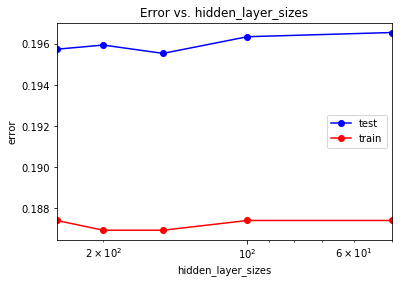

In [80]:
plt.semilogx(hidden_layer_sizes_arr, train_err_hidden_layer, 'b-o', label = 'test')
plt.semilogx(hidden_layer_sizes_arr, test_err_hidden_layer, 'r-o', label = 'train')
plt.xlim([np.max(hidden_layer_sizes_arr), np.min(hidden_layer_sizes_arr)])
plt.title('Error vs. hidden_layer_sizes')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('error')
plt.legend()
pass

Ошибка при оптимальном колличестве нейронов:

In [81]:
print(np.min(train_err_hidden_layer), np.min(test_err_hidden_layer))

0.195537525355 0.18693800284


In [82]:
hidden_layer = hidden_layer_sizes_arr[test_err_hidden_layer == np.min(test_err_hidden_layer)]
print(hidden_layer)

[150 200]


### Матрица рассогласования

In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[1401  258]
 [ 138  316]]


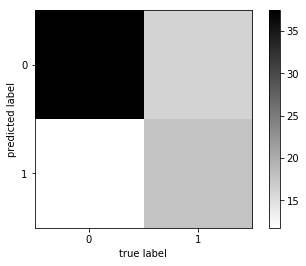

In [85]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Другие метрики качества:

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

         No       0.84      0.91      0.88      1539
        Yes       0.70      0.55      0.61       574

avg / total       0.80      0.81      0.81      2113



Так же для оценки качества можно построить рок-кривую, которая наиболее наглядно отразит качество классификации.